# STEPS

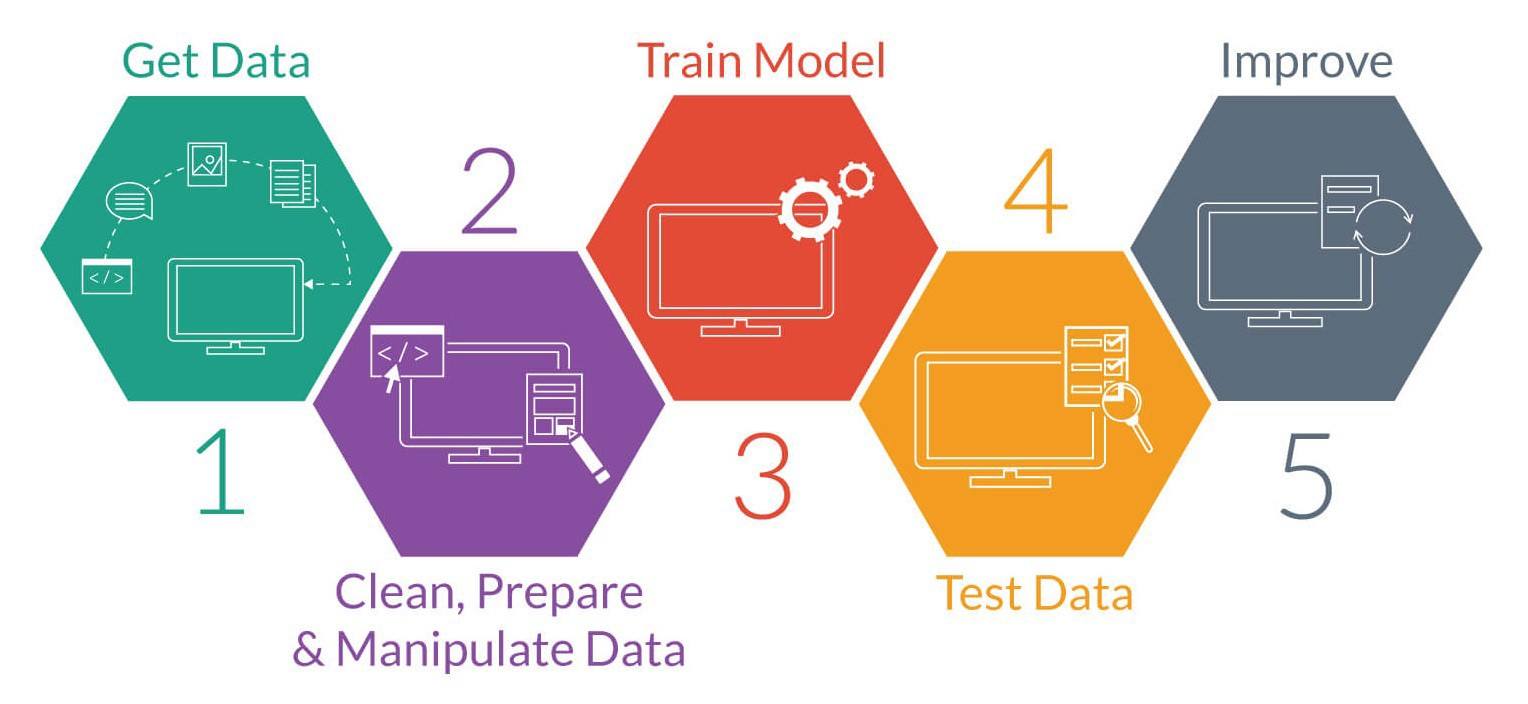

In [1]:
from IPython.display import Image
Image(filename='mlsteps.png')

In [2]:
import pandas as pd
import csv
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from numpy import random, where
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 1. Getting Data

In [46]:
df1= pd.read_csv('Reverse_Final_df.csv',low_memory=False)
#print(df['TaskCategory'].unique())

data1 = list(df1['raw'].head())
print(data1)

['08/28/2016 23:59:00 PM\nLogName=Security\nSourceName=Microsoft Windows security auditing.\nEventCode=4703\nEventType=0\nType=Information\nComputerName=we1775srv.waynecorpinc.local\nTaskCategory=Authorization Policy Change\nOpCode=Info\nRecordNumber=516329\nKeywords=Audit Success\nMessage=A user right was adjusted.\n\nSubject:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nTarget Account:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nProcess Information:\n\tProcess ID:\t\t0x3b8\n\tProcess Name:\t\tC:\\Windows\\System32\\svchost.exe\n\nEnabled Privileges:\n\t\t\tSeAssignPrimaryTokenPrivilege\n\t\t\tSeIncreaseQuotaPrivilege\n\t\t\tSeSecurityPrivilege\n\t\t\tSeTakeOwnershipPrivilege\n\t\t\tSeLoadDriverPrivilege\n\t\t\tSeSystemtimePrivilege\n\t\t\tSeBackupPrivilege\n\t\t\tSeRestorePrivilege\n\t\t\tSeShutdownPrivilege\n\t\t

In [3]:
df= pd.read_csv('Reverse_Final_df.csv',low_memory=False)
#print(df['TaskCategory'].unique())

data = list(df['raw'].head())
print(data[0])

['08/26/2016 00:42:53 AM\nLogName=Security\nSourceName=Microsoft Windows security auditing.\nEventCode=4688\nEventType=0\nType=Information\nComputerName=we7422srv.waynecorpinc.local\nTaskCategory=Process Creation\nOpCode=Info\nRecordNumber=511092\nKeywords=Audit Success\nMessage=A new process has been created.\n\nCreator Subject:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe7422srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nTarget Subject:\n\tSecurity ID:\t\tNULL SID\n\tAccount Name:\t\t-\n\tAccount Domain:\t\t-\n\tLogon ID:\t\t0x0\n\nProcess Information:\n\tNew Process ID:\t\t0x1578\n\tNew Process Name:\tC:\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-winprintmon.exe\n\tToken Elevation Type:\t%%1936\n\tMandatory Label:\t\tMandatory Label\\System Mandatory Level\n\tCreator Process ID:\t0x1b0\n\tCreator Process Name:\tC:\\Program Files\\SplunkUniversalForwarder\\bin\\splunkd.exe\n\tProcess Command Line:\t"C:\\Program Files\\SplunkUniversalForw

# 2. Clean, Prepare, Manipulate Data (Preprocessing)

In [11]:

patt4 = []

account_name = 'Account Name'
things = ['EventCode', 'TaskCategory', 'Message', 'Logon ID', 'Impersonation Level', 'Token Elevation Type', 'Source Address', 'Source Port', 'Logon Type', 'Process ID']
diction = {'msg': ''}

for patt in data:

    patt2 = patt.replace('\n','|')
    patt2 = patt2.replace(':|\t','|')
    patt2 = patt2.replace(':','|')
    patt2 = patt2.replace('=','|')
    patt2 = patt2.replace('\t','')
    patt3 = patt2.split('|')
    print(patt3)
    index_account = patt3.index(account_name) + 1
    name = patt3[index_account]

    msg = ''
    if name == 'we1775srv$':
        for j in things:
            if j in patt3:
                index = patt3.index(j) + 1
                msg = msg + ' ' + patt3[index]

        patt4.append(msg)
        diction['msg'] = patt4

#print(len(diction['msg']))

'''df2 = pd.DataFrame(diction)

df2.to_csv('./users_pattern/' + name + '')

print(df2)'''


['08/26/2016 00', '42', '53 AM', 'LogName', 'Security', 'SourceName', 'Microsoft Windows security auditing.', 'EventCode', '4688', 'EventType', '0', 'Type', 'Information', 'ComputerName', 'we7422srv.waynecorpinc.local', 'TaskCategory', 'Process Creation', 'OpCode', 'Info', 'RecordNumber', '511092', 'Keywords', 'Audit Success', 'Message', 'A new process has been created.', '', 'Creator Subject', 'Security ID', 'NT AUTHORITY\\SYSTEM', 'Account Name', 'we7422srv$', 'Account Domain', 'WAYNECORPINC', 'Logon ID', '0x3E7', '', 'Target Subject', 'Security ID', 'NULL SID', 'Account Name', '-', 'Account Domain', '-', 'Logon ID', '0x0', '', 'Process Information', 'New Process ID', '0x1578', 'New Process Name', 'C', '\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-winprintmon.exe', 'Token Elevation Type', '%%1936', 'Mandatory Label', 'Mandatory Label\\System Mandatory Level', 'Creator Process ID', '0x1b0', 'Creator Process Name', 'C', '\\Program Files\\SplunkUniversalForwarder\\bin\\splunkd

"df2 = pd.DataFrame(diction)\n\ndf2.to_csv('./users_pattern/' + name + '')\n\nprint(df2)"

# Continuation of 2

In [72]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
import gensim
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
import pandas as pd

data3 = pd.read_csv('user1.csv')

vectorizer = Vectorizer()
sentence = list(data3['msg'])

vectorizer.run(sentence)

v_bert = vectorizer.vectors
print(v_bert[0])

dist_1 = spatial.distance.cosine(v_bert[0], v_bert[1])
dist_2 = spatial.distance.cosine(v_bert[0], v_bert[4])
print('dist_1: {0}, dist_2: {1}'.format(dist_1, dist_2))


Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[-2.89542615e-01 -2.63663232e-01  6.32271245e-02  3.58091965e-02
  1.25502208e-02 -5.88652492e-02  8.06803852e-02  7.72204548e-02
 -2.59380251e-01 -1.76879555e-01 -9.25354958e-02 -4.56190109e-02
 -7.93617293e-02  1.32018402e-01 -7.12755024e-02  2.70856112e-01
  1.54677015e-02  1.05344690e-01  1.32017896e-01 -1.83052689e-01
  1.61881447e-01 -2.46623814e-01  1.29635289e-01 -8.05191025e-02
  1.70430504e-02  3.69174406e-03  5.00683933e-02 -2.08467036e-01
 -2.02560455e-01  1.66485742e-01  1.10950671e-01  1.73700139e-01
 -3.65915120e-01 -1.59303591e-01  1.32272929e-01  8.28834921e-02
  8.87349844e-02 -1.65282249e-01 -1.48738950e-01  3.78424227e-02
  2.07608547e-02  4.54281345e-02  6.73630238e-02 -1.89628415e-02
  1.16345286e-01  8.91513228e-02 -2.41992021e+00 -2.87205637e-01
 -2.70824611e-01 -3.48807454e-01 -1.45029768e-01 -1.03964165e-01
 -1.53998524e-01  1.88494116e-01  2.37386659e-01  2.02857837e-01
 -2.38599330e-01  1.63107187e-01  1.27746448e-01  2.01437876e-01
  3.51043910e-01 -1.54324

# 3. Model Training

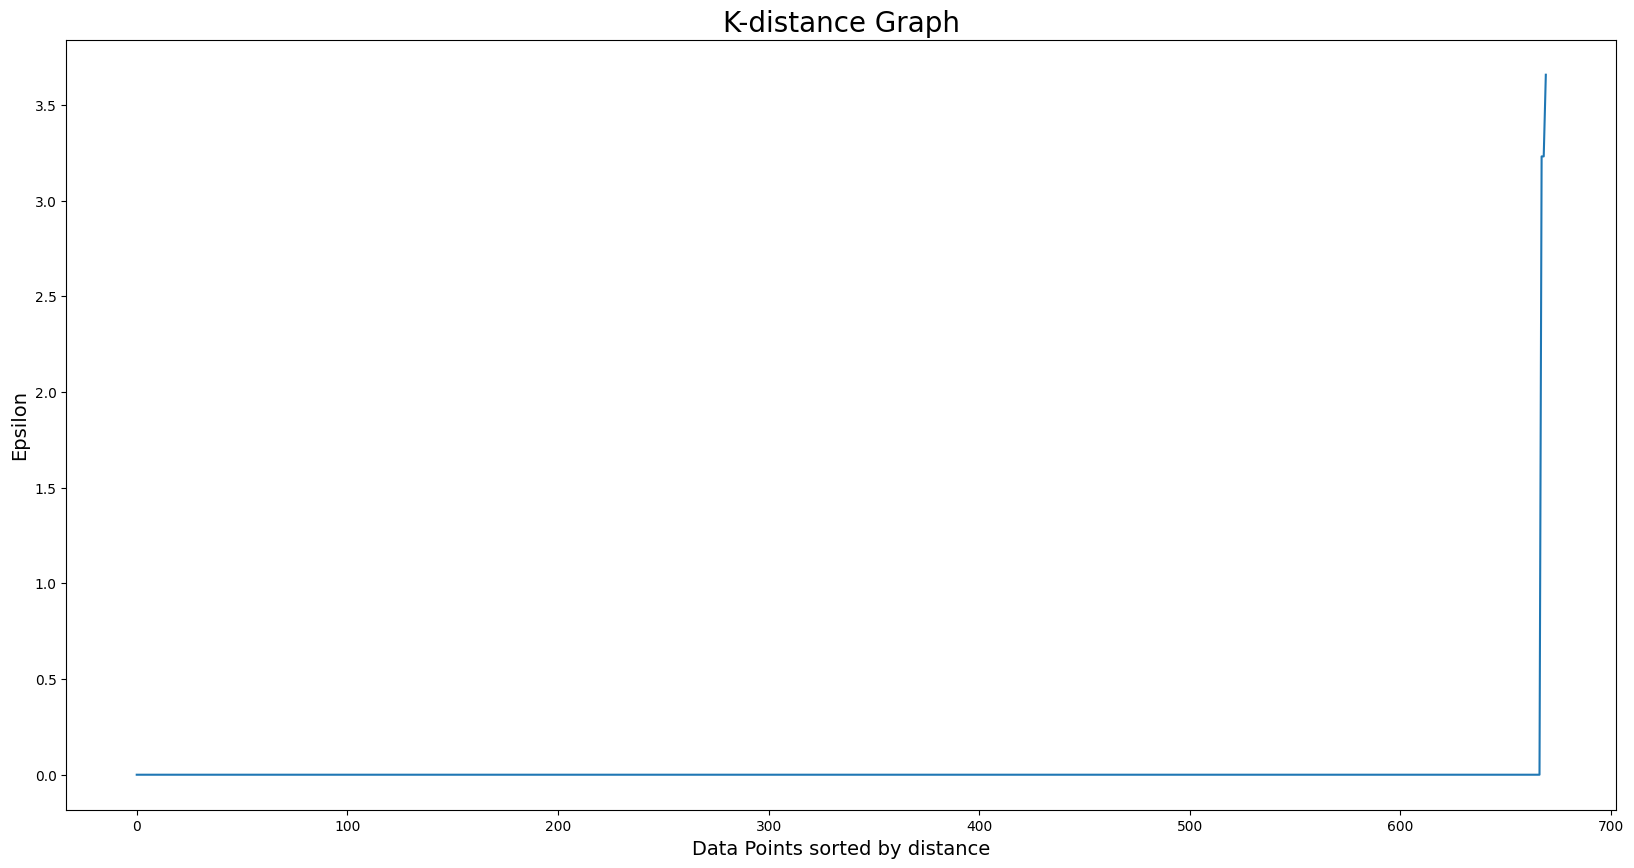

In [73]:
data3 = pd.read_csv('user1.csv')
arr = np.array(v_bert)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(arr)
distances, indices = nbrs.kneighbors(arr)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# Anomalies
# 42, 4670 Authorization Policy Change Permissions on an object were changed.
# 345, 5140 File Share A network share object was accessed.
# 578, 4985 File System The state of a transaction has changed.
# 601, 4670 Authorization Policy Change Permissions on an object were changed.
# 610, 4673 Sensitive Privilege Use A privileged service was called.

In [74]:
import numpy as np

model = DBSCAN(algorithm='auto', eps=200, leaf_size=30, metric='euclidean',
               metric_params=None, min_samples=3, n_jobs=None, p=None)

#We'll fit the model with x dataset and get the prediction data with the fit_predict() method.
#arr = np.array(display_arr)

pred = model.fit_predict(arr)

#Next, we'll extract the negative outputs as the outliers.

anom_index = where(pred == -1)
print(anom_index)

values = arr[anom_index]

(array([665, 666, 667, 668, 669], dtype=int64),)


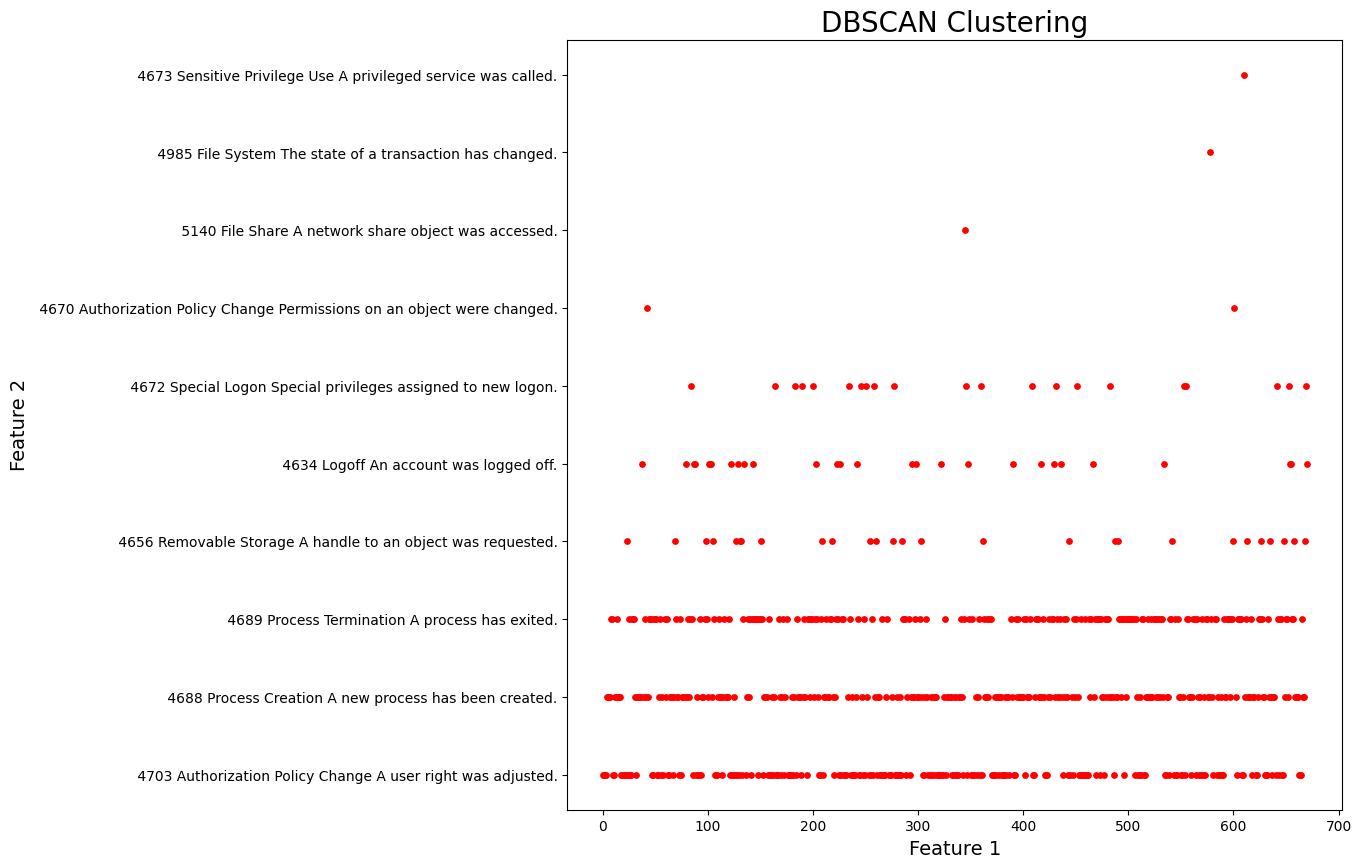

In [75]:
import matplotlib


plt.figure(figsize=(10,10))
plt.scatter(data3['Unnamed: 0'],data3['msg'],c='red',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

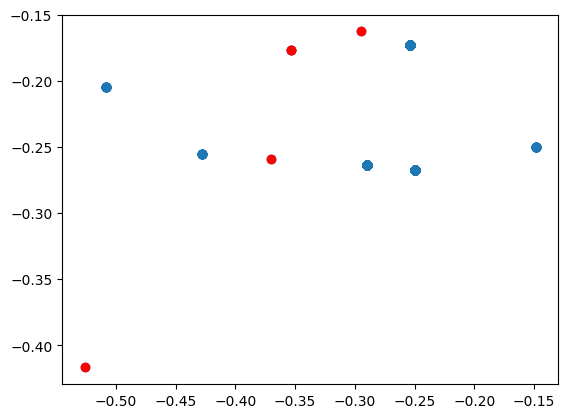

In [64]:
plt.scatter(arr[:,0], arr[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()
